In [1]:
import pandas as pd 

In [2]:
import sys
import csv

maxInt = sys.maxsize

while True:
    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)
df = pd.read_csv("projects.csv", engine='python')

In [3]:
df

project_name  \
0                     pvlib-python   
1                        pvfactors   
2                             gsee   
3                       PVMismatch   
4                          rdtools   
...                            ...   
1445                       PO.DAAC   
1446              Awesome Sentinel   
1447      geospatial-data-catalogs   
1448  Profit and emission database   
1449  Industrial Ecology Dashboard   

                                               oneliner     git_namespace  \
0     A set of documented functions for simulating t...             pvlib   
1     Open source view-factor model for diffuse shad...          SunPower   
2                        Global Solar Energy Estimator.  renewables-ninja   
3     An explicit Python PV system IV & PV curve tra...          SunPower   
4     An open source library to support reproducible...              NREL   
...                                                 ...               ...   
1445  NASA Earth Observing System Data and Informati...               NaN   
1446  A curated list of awesome tools, tutorials and...     Fernerkundung   
1447  A list of open geospatial datasets available o...            giswqs   
1448  A free public database on large corporate emis...    spreadsheets/d   
1449  A collection of open source projects relevant ...           IndEcol   

                                                git_url platform  \
0             https://github.com/pvlib/pvlib-python.git   github   
1             https://github.com/SunPower/pvfactors.git   github   
2          https://github.com/renewables-ninja/gsee.git   github   
3            https://github.com/SunPower/PVMismatch.git   github   
4                   https://github.com/NREL/rdtools.git   github   
...                                                 ...      ...   
1445                                                NaN   custom   
1446     https://github.com/kr-stn/awesome-sentinel.git   github   
1447  https://github.com/opengeos/geospatial-data-ca...   github   
1448                                                NaN   custom   
1449           https://github.com/IndEcol/Dashboard.git   github   

                                                 topics  \
0     solar-energy,python,renewable-energy,renewable...   
1         solar-energy,renewable-energy,python,bifacial   
2     solar,pandas,energy,irradiance,photovoltaic,pv...   
3                 numpy,scipy,python,solar,photovoltaic   
4                                                   NaN   
...                                                 ...   
1445                                                NaN   
1446  science,research,open-data,satellite-imagery,s...   
1447  aws,earth-engine,geospatial,geospatial-data,op...   
1448                                                NaN   
1449                     industrial-ecology,linked-list   

                              rubric      last_commit_date  stargazers_count  \
0     Photovoltaics and Solar Energy  2023/06/10, 01:24:39             886.0   
1     Photovoltaics and Solar Energy  2022/02/22, 21:53:32              72.0   
2     Photovoltaics and Solar Energy  2020/07/21, 06:28:35              99.0   
3     Photovoltaics and Solar Energy  2022/04/14, 19:15:36              60.0   
4     Photovoltaics and Solar Energy  2023/05/16, 22:12:13             126.0   
...                              ...                   ...               ...   
1445                   Curated Lists                   NaN               NaN   
1446                   Curated Lists  2022/08/14, 07:59:42             490.0   
1447                   Curated Lists  2023/06/11, 04:57:05             415.0   
1448                   Curated Lists                   NaN               NaN   
1449                   Curated Lists  2023/05/05, 15:07:56             109.0   

      number_of_dependents  ...              organization_github_url  \
0                    358.0  ...             https://github.com/pvlib   
1        

In [4]:
df_readme = df['readme'].fillna('')
docs = df_readme.to_list()

df_topics = df["topics"].fillna('')
topics = df_topics.to_list()

In [5]:
topics

['solar-energy,python,renewable-energy,renewables,photovoltaic',
 'solar-energy,renewable-energy,python,bifacial',
 'solar,pandas,energy,irradiance,photovoltaic,pv,electricity,ninja',
 'numpy,scipy,python,solar,photovoltaic',
 '',
 'machine-learning,neural-network,data-processing,python,matlab,tensorflow',
 'photovoltaic,solar-energy,solar-cells,machine-learning,computer-vision',
 '',
 '',
 '',
 'python,photovoltaics,raytracing,optics,energy',
 '',
 '',
 '',
 'radiance,bifacial,photovoltaics,renewable-energy,renewables,gui',
 '',
 '',
 'photovoltaic,semiconductor,solar-cells,python,hacktoberfest',
 'solax,solar,photovoltaic,home-automation,iot,raspberry-pi',
 '',
 '',
 'engineering,energy,solar,thermodynamics,optimisation,simulation,modelica,modelica-library',
 '',
 '',
 'pvoutput,python,python-library,solar,nowcasting',
 'nowcasting',
 'hut23,hut23-425',
 'solar-energy,solar-cells,sun-position,beam-irradiance,photovoltaic,python,modeling,simulation,flight-simulation',
 'freeboard,iot,

['b\'<img src="docs/sphinx/source/_images/pvlib_logo_horiz.png" width="600">\\n\\n<table>\\n<tr>\\n  <td>Latest Release</td>\\n  <td>\\n    <a href="https://pypi.org/project/pvlib/">\\n    <img src="https://img.shields.io/pypi/v/pvlib.svg" alt="latest release" />\\n    </a>\\n    <a href="https://anaconda.org/conda-forge/pvlib-python">\\n    <img src="https://anaconda.org/conda-forge/pvlib-python/badges/version.svg" />\\n    </a>\\n    <a href="https://anaconda.org/conda-forge/pvlib-python">\\n    <img src="https://anaconda.org/conda-forge/pvlib-python/badges/latest_release_date.svg" />\\n    </a>\\n</tr>\\n<tr>\\n  <td>License</td>\\n  <td>\\n    <a href="https://github.com/pvlib/pvlib-python/blob/main/LICENSE">\\n    <img src="https://img.shields.io/pypi/l/pvlib.svg" alt="license" />\\n    </a>\\n</td>\\n</tr>\\n<tr>\\n  <td>Build Status</td>\\n  <td>\\n    <a href="http://pvlib-python.readthedocs.org/en/stable/">\\n    <img src="https://readthedocs.org/projects/pvlib-python/badge/?v
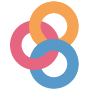
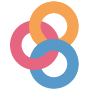
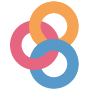
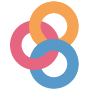

In [6]:
docs

In [7]:
from bertopic import BERTopic
 
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs[0:100],y=topics[0:100])

C:\Users\t.augspurger\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\t.augspurger\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\t.augspurger\AppData\Local\Pr

ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.

In [ ]:
topic_model.get_topic(1)

In [ ]:
topics.get_topic(6)